# set up

In [1]:
# setup fastai if needed
try: import fastbook
except ImportError: import subprocess; subprocess.run(['pip','install','-Uq','fastbook'])

# Import fastai code.
from fastai.vision.all import *
from fastai.vision.gan import *

In [2]:
from fastai.callback.all import *

In [3]:
# GAN Generator Data
# out_size
# n_channels
# in_sz
# n_features
# n_extra_layers
# ks
# stride
# padding
# bias
# ndim
# norm_type
# bs_1st
# act_cls
# transpose
# init
# xtra
# bias_std
# dilation
# groups
# padding_mode

In [4]:
# GAN Critic Data
# in_size
# n_channels
# n_features
# n_extra_layers
# norm_type
# ks
# stride
# padding
# bias
# ndim
# bn_1st
# act_cls
# transpose
# init
# xtra
# bias_std
# dilation
# groups
# padding_mode

# mnist

In [5]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/scratch/cs344/data/mnist_png/testing'),Path('/scratch/cs344/data/mnist_png/training')]

In [6]:
mnist = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
                  get_y=parent_label)

In [7]:
dls = mnist.dataloaders(untar_data(URLs.MNIST))

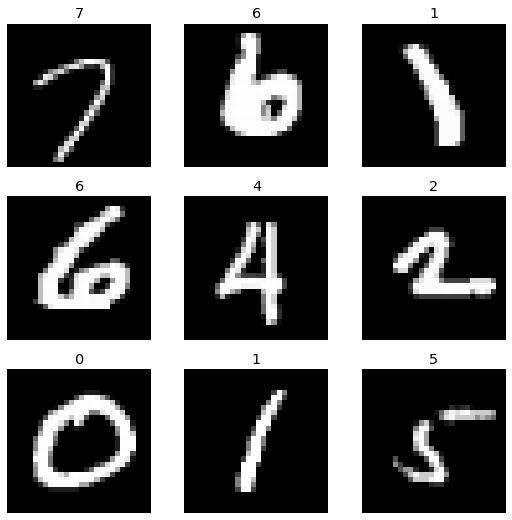

In [8]:
dls.show_batch()

test = GANModule()

# pets

In [9]:
pets = untar_data(URLs.PETS) / "images"

In [10]:
def is_cat(x): return x[0].isupper() #Tests if the first letter is capital, if so then true (is cat)
petsDls = ImageDataLoaders.from_name_func( #Gets training data
    path, get_image_files(path), valid_pct=0.2, seed=42, #Breaks up the data into training data and validation
    label_func=is_cat, item_tfms=Resize(224)) #Resizes the picture smaller so the model will run quicker, less accurate


# rooms  
from: https://colab.research.google.com/github/fastai/fastai/blob/master/nbs/24_vision.gan.ipynb#scrollTo=XjQ5zqPH3sRe

In [11]:
bs = 128
size = 64

In [12]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms=Resize(size, method=ResizeMethod.Crop), 
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

In [13]:
path = untar_data(URLs.LSUN_BEDROOMS)roomsrooms

In [14]:
dls = dblock.dataloaders(path, path=path, bs=bs)

In [15]:
pdls = dblock.dataloaders(pets, path=pets, bs=bs)

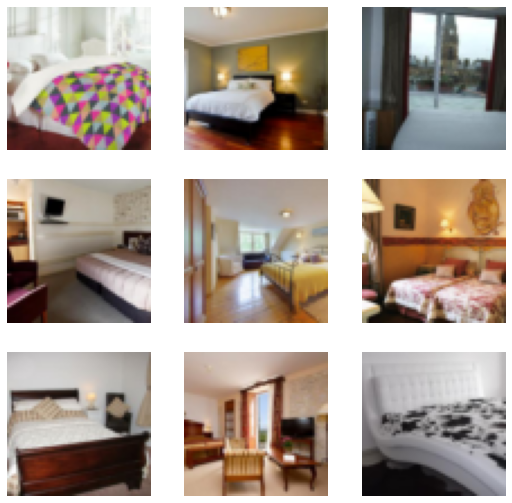

In [21]:
dls.show_batch()

# code

In [16]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [17]:
learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)

In [18]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [19]:
learn.fit(1, 2e-4, wd=0.)

/opt/anaconda/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/opt/anaconda/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/opt/anaconda/lib/python3.8/site-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time


TypeError: requires_grad_() takes 1 positional argument but 2 were given

In [ ]:
learn.show_results(max_n=9, ds_idx=0)